In [2]:
# import libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import natural language toolkit for preprocessing
import nltk
from nltk.tokenize import TweetTokenizer
import string
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# install for text visualization
from wordcloud import WordCloud
import PIL # import pillow for image visualization
from PIL import Image, ImageDraw, ImageFont

# import sklearn tools for machine learning
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve 
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

#ignore wornings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# import imblearn for unbalanced class
from imblearn.pipeline import Pipeline as ImPipeline
from imblearn.over_sampling import SMOTE

from sklearn.metrics import roc_curve, RocCurveDisplay

In [3]:
import sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [4]:
#Import the cleaned dataset
df = pd.read_csv('./Data/Cleaned_tweet&company.csv')

# Processing steps
1. Make DFs for each type of Tweet
2. Make a list of the Tweets for each type
3. Tokenize
4. Lower case
5. Remove handles
6. Remove punctuation
7. Remove stop words
8. Lemmitize
9. Vectorize

(1) We make dataframes for each of our 6 categories, positive, negative and neutral tweets for Google and Apple

In [5]:
pos_Google_df = df[(df['Company'] == 'Google') & (df['Emotion'] == 'Positive')]
neut_Google_df = df[(df['Company'] == 'Google') & (df['Emotion'] == 'Neutral')]
neg_Google_df = df[(df['Company'] == 'Google') & (df['Emotion'] == 'Negative')]

pos_Apple_df = df[(df['Company'] == 'Apple') & (df['Emotion'] == 'Positive')]
neut_Apple_df = df[(df['Company'] == 'Apple') & (df['Emotion'] == 'Neutral')]
neg_Apple_df = df[(df['Company'] == 'Apple') & (df['Emotion'] == 'Negative')]

(2) Now we parse each dataframe's Tweets and put them in a list

In [6]:
pos_Google_corpus = pos_Google_df['Tweet'].to_list()
neut_Google_corpus = neut_Google_df['Tweet'].to_list()
neg_Google_corpus = neg_Google_df['Tweet'].to_list()

pos_Apple_corpus = pos_Apple_df['Tweet'].to_list()
neut_Apple_corpus = neut_Apple_df['Tweet'].to_list()
neg_Apple_corpus = neg_Apple_df['Tweet'].to_list()

In [7]:
pos_Google_corpus[:5]

["@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",
 '#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan',
 'Excited to meet the @samsungmobileus at #sxsw so I can show them my Sprint Galaxy S still running Android 2.1.   #fail',
 "Find &amp; Start Impromptu Parties at #SXSW With @HurricaneParty http://bit.ly/gVLrIn I can't wait til the Android app comes out.",
 'Foursquare ups the game, just in time for #SXSW http://j.mp/grN7pK) - Still prefer @Gowalla by far, best looking Android app to date.']

(3, 4, 5) Write a function to tokenize tweets. This will also lower case our words and remove handles

In [8]:
def tokenize_tweets(corpus, preserve_case=False, strip_handles=True):
    """Function returns tokens based on a corpus passed in.
    --------------------
    Arguments:
    corpus: the collection of words to be tokenized
    preserve_case: whether to lower case upper case letters
    stip_handles: whether to remove twitter handles"""
    
    tokenizer = TweetTokenizer(preserve_case=preserve_case, 
                               strip_handles=strip_handles)
    tokens = tokenizer.tokenize(','.join(corpus))
    return tokens

In [9]:
#Now we actually tokenize the corpuses
pos_Google_tokens = tokenize_tweets(pos_Google_corpus)
neut_Google_tokens = tokenize_tweets(neut_Google_corpus)
neg_Google_tokens = tokenize_tweets(neg_Google_corpus)


pos_Apple_tokens = tokenize_tweets(pos_Apple_corpus)
neut_Apple_tokens = tokenize_tweets(neut_Apple_corpus)
neg_Apple_tokens = tokenize_tweets(neg_Apple_corpus)

In [10]:
#Visualize
FreqDist(pos_Google_tokens).most_common(60)

[(',', 1171),
 ('#sxsw', 837),
 ('.', 639),
 ('google', 600),
 ('the', 363),
 ('!', 349),
 ('to', 310),
 ('link', 293),
 ('{', 291),
 ('}', 291),
 ('at', 269),
 ('rt', 266),
 ('is', 198),
 ('"', 194),
 ('and', 184),
 ('of', 177),
 ('a', 164),
 ('for', 162),
 ('new', 139),
 (':', 135),
 ('-', 133),
 ('android', 129),
 ('in', 116),
 ('party', 105),
 ('circles', 105),
 ('social', 103),
 ('maps', 101),
 ('on', 95),
 ('i', 87),
 ('/', 85),
 ('you', 85),
 ('network', 84),
 ('launch', 81),
 ('with', 76),
 ('mobile', 75),
 ('&', 73),
 ('app', 72),
 ('it', 70),
 ('(', 68),
 ('#google', 68),
 ('?', 68),
 ('mayer', 66),
 ('from', 65),
 ('today', 63),
 ('marissa', 61),
 ('called', 60),
 ('great', 59),
 (')', 56),
 ("google's", 56),
 ('be', 55),
 ('major', 54),
 ('this', 53),
 ('\x89', 53),
 ('just', 51),
 ('time', 50),
 ('out', 49),
 ('about', 46),
 ('are', 46),
 ('...', 46),
 ("'", 43)]

(6, 7) Remove punctuation and stop words

In [11]:
stop_list = stopwords.words('english') + list(string.punctuation)
 # after testing we see words/punctuation that should not be included
stop_list += [',','#sxsw','{','}','"',':','#sxswi','...','sxsw']

stop_list_no_companies = stop_list + ['apple', 'google', '#apple', '#google']

In [12]:
# function to complete the task
def remove_stopwords(tokens, stop_list = stop_list):
    tokens_stopped = [word.encode('ascii','ignore').decode() 
                      for word in tokens 
                      if (word not in stop_list) & 
                      (word.startswith('http') == False)] #remove links
    return tokens_stopped

In [13]:
# Remove stopwords and punctuations from the tokenzied list
pos_Google_tokens_stopwords_removed = remove_stopwords(pos_Google_tokens)
neut_Google_tokens_stopwords_removed = remove_stopwords(neut_Google_tokens)
neg_Google_tokens_stopwords_removed = remove_stopwords(neg_Google_tokens)

pos_Apple_tokens_stopwords_removed = remove_stopwords(pos_Apple_tokens)
neut_Apple_tokens_stopwords_removed = remove_stopwords(neut_Apple_tokens)
neg_Apple_tokens_stopwords_removed = remove_stopwords(neg_Apple_tokens)

In [14]:
# Remove brand names for wordcloud 
pos_Google_tokens_stopwords_and_removed = remove_stopwords(pos_Google_tokens, stop_list_no_companies)
neut_Google_tokens_stopwords_and_removed = remove_stopwords(neut_Google_tokens, stop_list_no_companies)
neg_Google_tokens_stopwords_and_removed = remove_stopwords(neg_Google_tokens, stop_list_no_companies)

pos_Apple_tokens_stopwords_and_removed = remove_stopwords(pos_Apple_tokens, stop_list_no_companies)
neut_Apple_tokens_stopwords_and_removed = remove_stopwords(neut_Apple_tokens, stop_list_no_companies)
neg_Apple_tokens_stopwords_and_removed = remove_stopwords(neg_Apple_tokens, stop_list_no_companies)

In [15]:
FreqDist(neg_Apple_tokens_stopwords_removed).most_common(60)

[('ipad', 178),
 ('iphone', 143),
 ('apple', 100),
 ('rt', 86),
 ('2', 75),
 ('link', 62),
 ('app', 52),
 ('store', 46),
 ('', 40),
 ('like', 32),
 ('design', 29),
 ('people', 24),
 ('austin', 23),
 ('new', 22),
 ('apps', 21),
 ('one', 20),
 ('need', 19),
 ('#ipad', 19),
 ('headaches', 17),
 ('news', 17),
 ('get', 17),
 ('would', 17),
 ('line', 16),
 ('battery', 15),
 ('#apple', 15),
 ('america', 15),
 ("i've", 14),
 ('go', 14),
 ('long', 14),
 ('think', 14),
 ('fascist', 14),
 ('company', 14),
 ('#iphone', 13),
 ("i'm", 13),
 ('money', 13),
 ('pop-up', 13),
 ('time', 13),
 ('fast', 12),
 ('back', 12),
 ('day', 12),
 ('good', 12),
 ('#tapworthy', 12),
 ('see', 12),
 ('going', 11),
 ('thing', 11),
 ('via', 11),
 ('says', 11),
 ('take', 11),
 ('hate', 10),
 ('heard', 10),
 ('best', 10),
 ('gave', 10),
 ('nothing', 10),
 ('w', 10),
 ('fades', 10),
 ('every', 10),
 ('many', 9),
 ('users', 9),
 ('come', 9),
 ('already', 9)]

In [16]:
FreqDist(neg_Google_tokens_stopwords_removed).most_common(60)

[('google', 135),
 ('rt', 52),
 ('link', 39),
 ('', 29),
 ('circles', 26),
 ('social', 26),
 ('new', 21),
 ('launch', 19),
 ('android', 16),
 ('today', 16),
 ('network', 15),
 ('#google', 12),
 ('major', 12),
 ('called', 11),
 ('mayer', 10),
 ('bing', 9),
 ('maps', 9),
 ('possibly', 8),
 ('product', 8),
 ('much', 8),
 ('tv', 8),
 ('app', 8),
 ('#circles', 7),
 ('vs', 7),
 ('get', 7),
 ('needs', 7),
 ('another', 7),
 ('like', 7),
 ('way', 7),
 ('room', 7),
 ('need', 6),
 ('better', 6),
 ('tag', 6),
 ('users', 6),
 ('marissa', 6),
 ('says', 5),
 ('search', 5),
 ('location', 5),
 ('launched', 5),
 ('lost', 5),
 ('caring', 5),
 ('business', 5),
 ('service', 5),
 ('data', 5),
 ('products', 5),
 ('technical', 5),
 ("they're", 5),
 ('really', 5),
 ('facebook', 5),
 ('time', 5),
 ('people', 5),
 ('false', 4),
 ('alarm', 4),
 ('coming', 4),
 ('probably', 4),
 ('ever', 4),
 ('day', 4),
 ('#qagb', 4),
 ('first', 4),
 ('wait', 4)]

# Lemmitize

In [17]:
# Function to lemmatize tokens
def lemmatize(tokens_list):
    lemmatizer = WordNetLemmatizer()
    tokens_lemm = [lemmatizer.lemmatize(token) for token in tokens_list]
    return tokens_lemm

In [18]:
pos_Google_tokens_lemmatize = lemmatize(pos_Google_tokens_stopwords_removed)
neut_Google_tokens_lemmatize = lemmatize(neut_Google_tokens_stopwords_removed)
neg_Google_tokens_lemmatize = lemmatize(neg_Google_tokens_stopwords_removed)

pos_Apple_tokens_lemmatize = lemmatize(pos_Apple_tokens_stopwords_removed)
neut_Apple_tokens_lemmatize = lemmatize(neut_Apple_tokens_stopwords_removed)
neg_Apple_tokens_lemmatize = lemmatize(neg_Apple_tokens_stopwords_removed)

In [19]:
#for wordclouds without company names
pos_Google_tokens_lemmatize_word = lemmatize(pos_Google_tokens_stopwords_and_removed)
neut_Google_tokens_lemmatize_word = lemmatize(neut_Google_tokens_stopwords_and_removed)
neg_Google_tokens_lemmatize_word = lemmatize(neg_Google_tokens_stopwords_and_removed)

pos_Apple_tokens_lemmatize_word = lemmatize(pos_Apple_tokens_stopwords_and_removed)
neut_Apple_tokens_lemmatize_word = lemmatize(neut_Apple_tokens_stopwords_and_removed)
neg_Apple_tokens_lemmatize_word = lemmatize(neg_Apple_tokens_stopwords_and_removed)

In [20]:
FreqDist(pos_Google_tokens_lemmatize).most_common(30)

[('google', 600),
 ('link', 297),
 ('rt', 266),
 ('', 146),
 ('new', 139),
 ('android', 129),
 ('party', 111),
 ('map', 109),
 ('circle', 107),
 ('social', 103),
 ('launch', 87),
 ('network', 84),
 ('mobile', 75),
 ('app', 72),
 ('#google', 68),
 ('mayer', 67),
 ('today', 63),
 ('marissa', 61),
 ('called', 60),
 ('great', 59),
 ('time', 56),
 ("google's", 56),
 ('major', 54),
 ('user', 44),
 ('get', 42),
 ('w', 41),
 ('possibly', 41),
 ('#android', 39),
 ('search', 39),
 ('day', 37)]

# Visualize Most Used Words for Positive and Negative Tweets

In [21]:
# Write a function for wordcloud generation
def generate_wordcloud(tokens, collocations=False, background_color='white', 
                       colormap='Greens', display=True):
    ## Initalize a WordCloud
    wordcloud = WordCloud(collocations=collocations,
                          background_color=background_color, 
                          colormap=colormap, 
                          width=500, height=300)

    ## Generate wordcloud from tokens
    wordcloud.generate(','.join(tokens))

    ## Plot with matplotlib
    if display:
        plt.figure(figsize = (12, 15), facecolor = None) 
        plt.imshow(wordcloud) 
        plt.axis('off');
    return wordcloud

In [22]:
# Remove company specific words (like Google for Google) for the soundclouds so we don't get noise

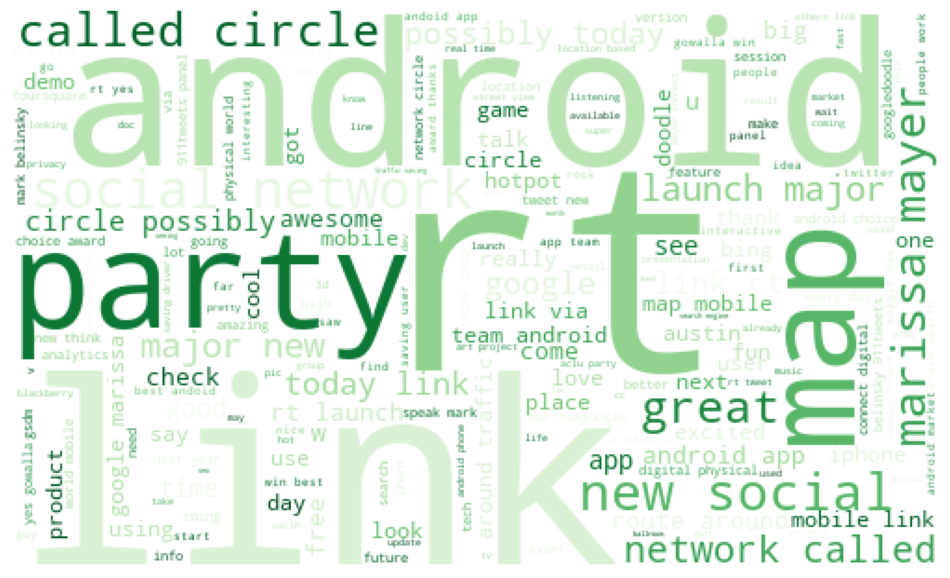

In [23]:
# Positive words for Google
wordcloud_Google_pos = generate_wordcloud(pos_Google_tokens_lemmatize_word, collocations = True)

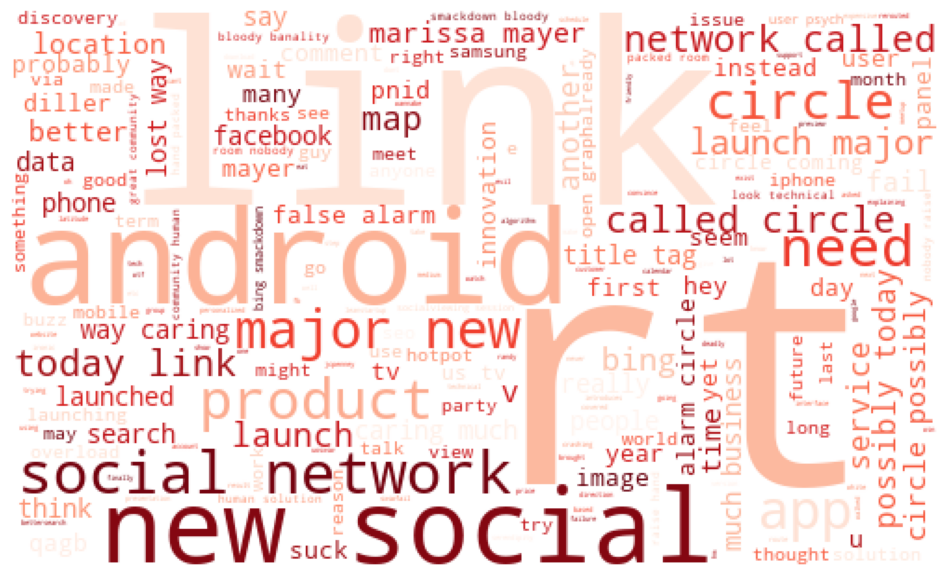

In [24]:
# And negative
wordcloud_Google_neg = generate_wordcloud(neg_Google_tokens_lemmatize_word, colormap='Reds', collocations = True)

In [73]:
# Let's create a function to compare the wordclouds
def compare_wordclouds(wc1, wc2):
    fig, ax = plt.subplots(figsize=(30,20), ncols=2)
    ax[0].imshow(wc1)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].imshow(wc2)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    plt.tight_layout();

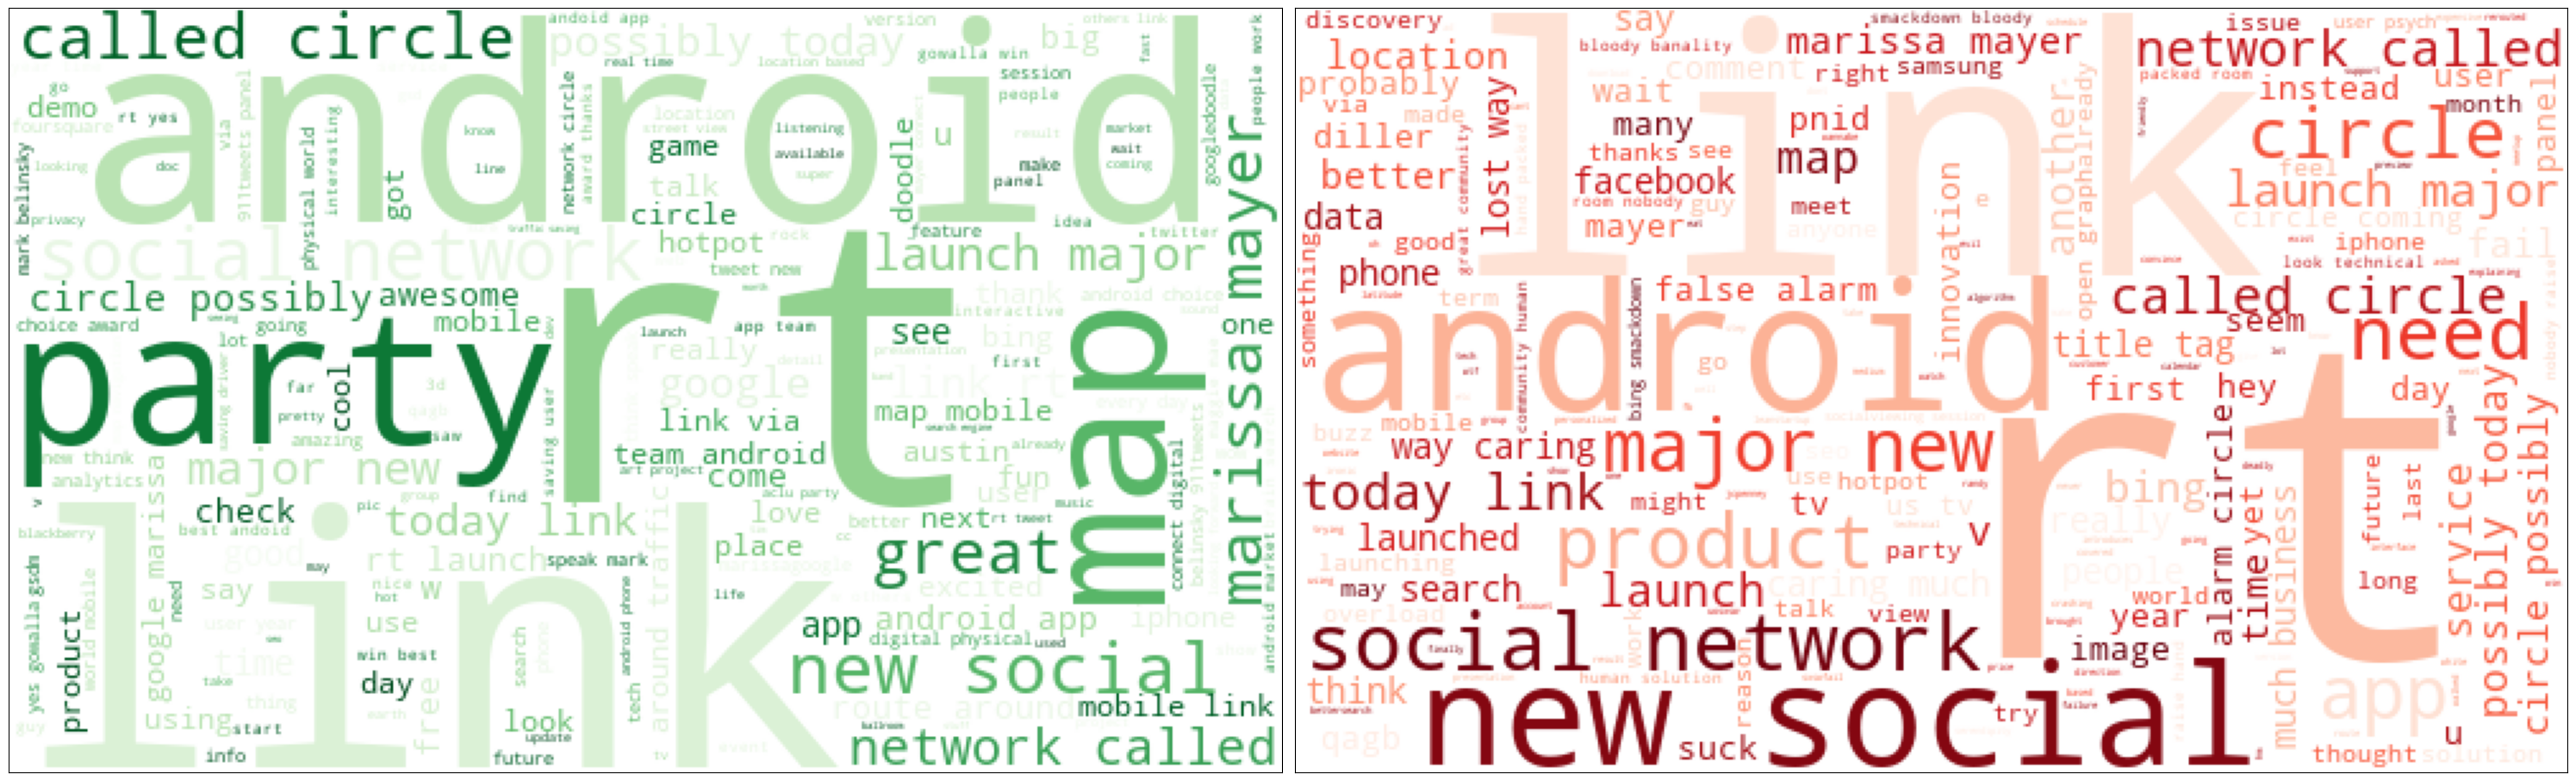

In [74]:
compare_wordclouds(wordcloud_Google_pos, wordcloud_Google_neg)

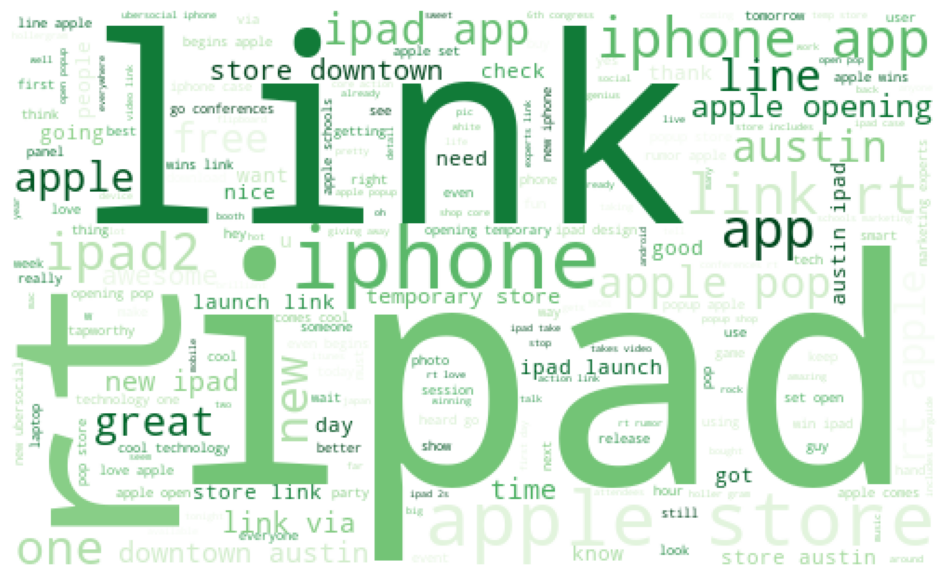

In [25]:
# Positive words for Apple
wordcloud_Apple_pos = generate_wordcloud(pos_Apple_tokens_stopwords_removed, collocations = True)

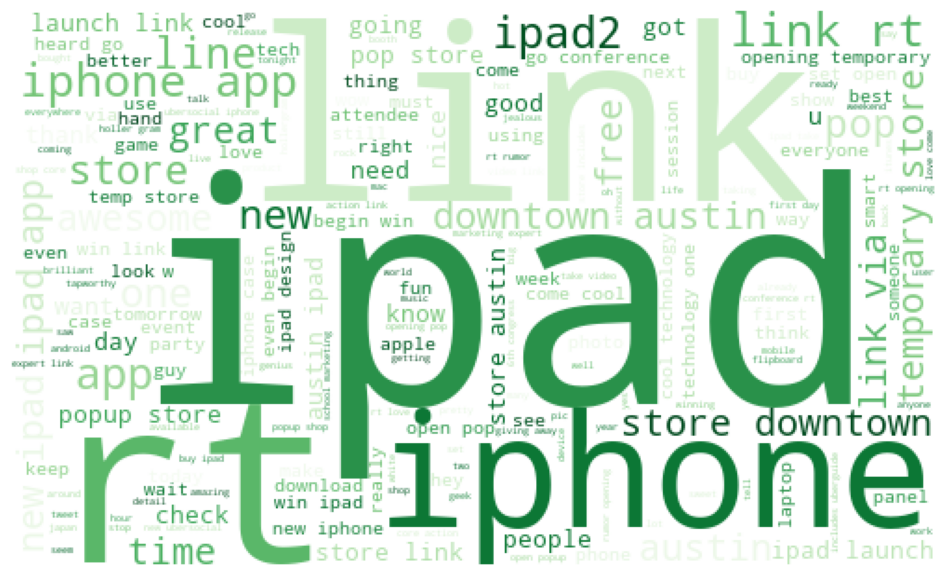

In [26]:
wordcloud_Apple_pos = generate_wordcloud(pos_Apple_tokens_lemmatize_word, collocations = True)

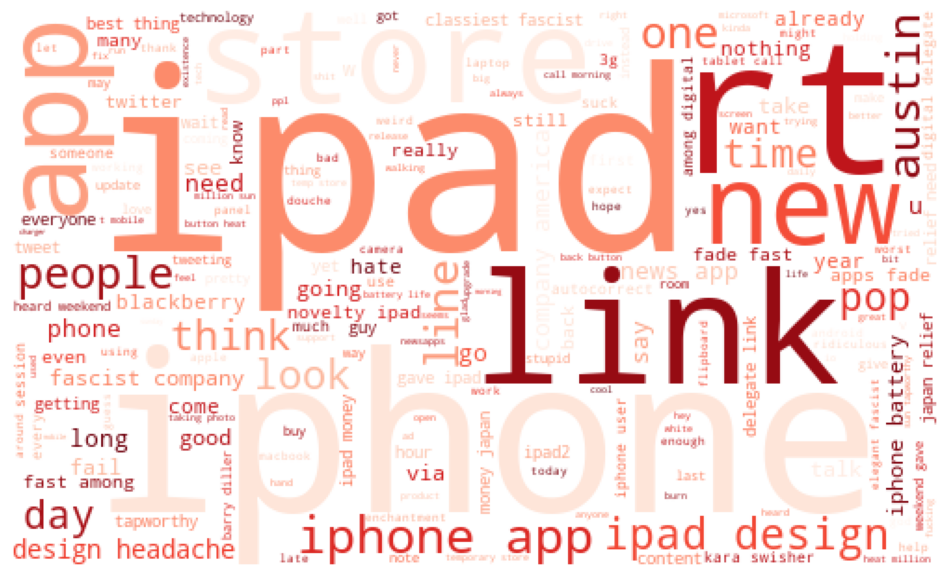

In [27]:
# And Google Negative
wordcloud_Apple_neg = generate_wordcloud(neg_Apple_tokens_lemmatize_word, colormap='Reds', collocations = True)

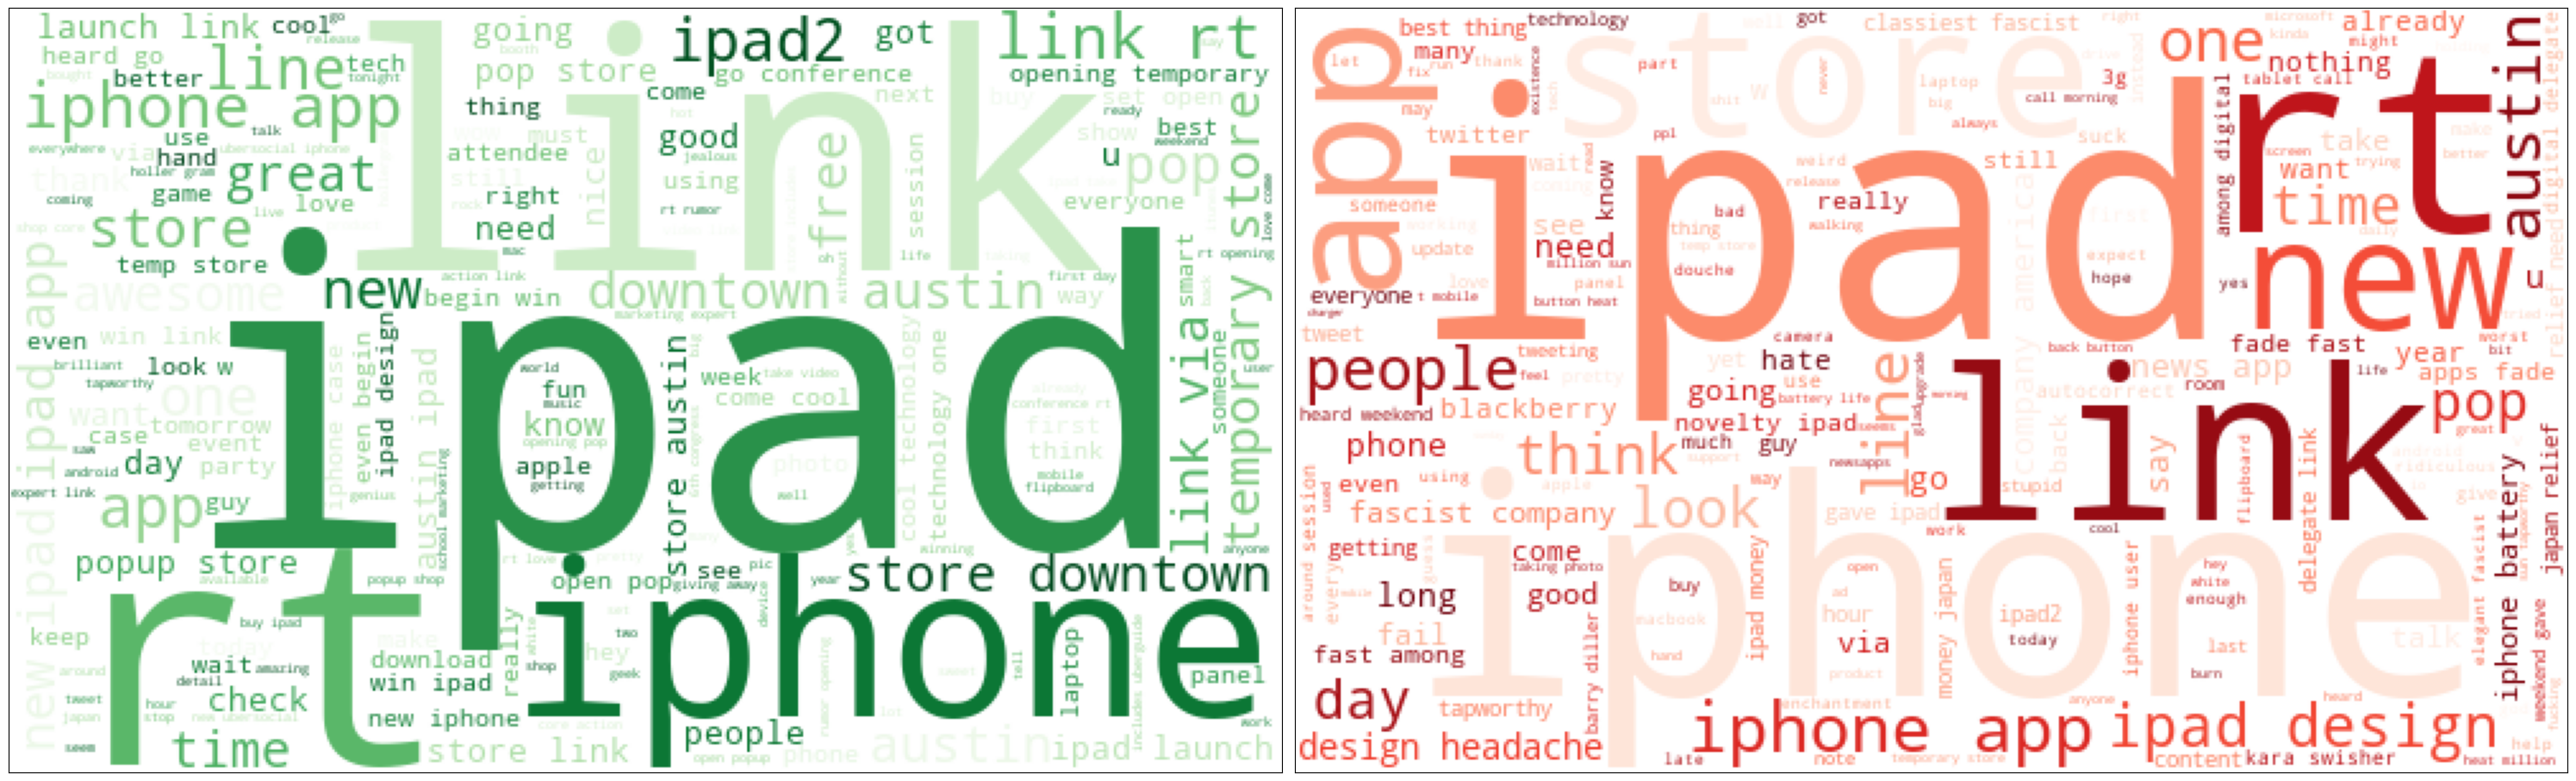

In [75]:
compare_wordclouds(wordcloud_Apple_pos, wordcloud_Apple_neg)

# Binary Classification

Start by removing neutral so we can build a baseline model

In [28]:
df_Google_binary = df [(df['Emotion'] != 'Neutral') & (df['Company'] == 'Google')]
df_Apple_binary = df [(df['Emotion'] != 'Neutral') & (df['Company'] == 'Apple')]

In [29]:
df_Google_binary.head()

Unnamed: 0                                              Tweet  \
4            4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   
6            7  #SXSW is just starting, #CTIA is around the co...   
9           10  Excited to meet the @samsungmobileus at #sxsw ...   
10          11  Find &amp; Start Impromptu Parties at #SXSW Wi...   
11          12  Foursquare ups the game, just in time for #SXS...   

   Company/Product   Emotion Company  
4           Google  Positive  Google  
6          Android  Positive  Google  
9          Android  Positive  Google  
10     Android App  Positive  Google  
11     Android App  Positive  Google

In [30]:
# Turn emotion column into binary; set negative to 0 and positive to 1
emotion_dict = {'Negative': 0, 'Positive': 1}
df_Google_binary['Emotion'] = df_Google_binary['Emotion'].map(emotion_dict)
df_Apple_binary['Emotion'] = df_Apple_binary['Emotion'].map(emotion_dict)

/var/folders/s1/pthgsjgj70vdf42p71vm7rb00000gn/T/ipykernel_53080/859895756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Google_binary['Emotion'] = df_Google_binary['Emotion'].map(emotion_dict)
/var/folders/s1/pthgsjgj70vdf42p71vm7rb00000gn/T/ipykernel_53080/859895756.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Apple_binary['Emotion'] = df_Apple_binary['Emotion'].map(emotion_dict)


In [31]:
df_Google_binary.head()

Unnamed: 0                                              Tweet  \
4            4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   
6            7  #SXSW is just starting, #CTIA is around the co...   
9           10  Excited to meet the @samsungmobileus at #sxsw ...   
10          11  Find &amp; Start Impromptu Parties at #SXSW Wi...   
11          12  Foursquare ups the game, just in time for #SXS...   

   Company/Product  Emotion Company  
4           Google        1  Google  
6          Android        1  Google  
9          Android        1  Google  
10     Android App        1  Google  
11     Android App        1  Google

In [32]:
df_Google_binary['Emotion'].value_counts(normalize= True)

Emotion
1    0.846309
0    0.153691
Name: proportion, dtype: float64

In [33]:
df_Apple_binary['Emotion'].value_counts(normalize= True)

Emotion
1    0.836149
0    0.163851
Name: proportion, dtype: float64

We need to smote to normalize the class imbalance. Going forward we will focus on Google

In [34]:
X = df_Google_binary['Tweet'] # Feature
y = df_Google_binary['Emotion'] # Binary target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) # split data into train and test

Start with a Dummy Classifier

In [35]:
# Instantiate tweet tokenizer
tokenizer = TweetTokenizer()

In [36]:
dummy_pipe = ImPipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                        stop_words=stop_list)), # NLP preprocessing: tokenize, remove stopwords, punctunations, lowercase
                     ('smote', SMOTE(sampling_strategy = 1, random_state = 42)), # use SMOTE to get 1:1 ratio
                     ('dumm', DummyClassifier(random_state=42))]) # dummy classifier

dummy_pipe.fit(X_train, y_train)

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x1635a3150>>)),
                ('smote', SMOTE(random_state=42, sampling_strategy=1)),
                ('dumm', DummyClassifier(random_state=42))])

In [37]:
dummy_classifier = DummyClassifier(strategy="most_frequent", random_state=42)

# Fit and predict with the DummyClassifier on the original (imbalanced) data
dummy_classifier.fit(X_train, y_train)
dummy_predictions = dummy_classifier.predict(X_test)

In [38]:
# predict target with dummy_pipe on testing set
y_pred = dummy_classifier.predict(X_test)
# print a classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.81      1.00      0.90       202

    accuracy                           0.81       248
   macro avg       0.41      0.50      0.45       248
weighted avg       0.66      0.81      0.73       248



/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [39]:
# check accuracy of the dummy model
accuracy_score(y_test, y_pred)


0.8145161290322581

In [40]:
# Check out confusion matrix
cm1 = confusion_matrix(y_test,y_pred)
cm1

array([[  0,  46],
       [  0, 202]])

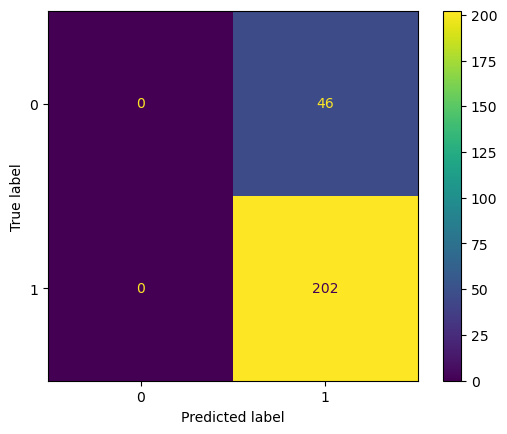

In [41]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()

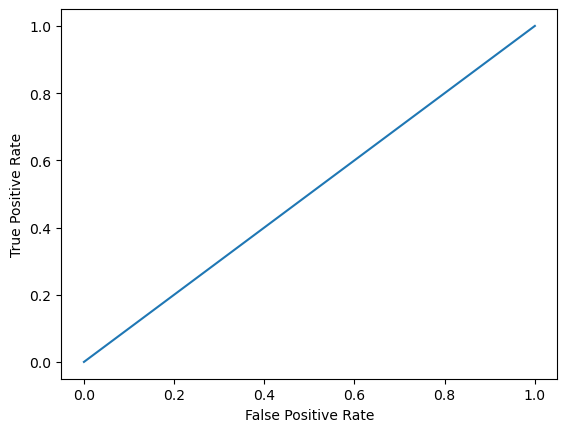

In [42]:
# Get predicted probabilities for the positive class
y_pred_prob = dummy_pipe.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

# Plot the ROC curve
roc_display.plot()

# Random Forest Model

In [43]:
# Create a pipeline for random forest.
rfc_pipe = ImPipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                    stop_words=stop_list)), # NLP preprocessing: tokenize, remove stopwords, punctunations, lowercase
                     ('smote', SMOTE(sampling_strategy = 1, random_state = 42)), # use SMOTE to get 1:1 ratio for both classes
                     ('rfc', RandomForestClassifier(random_state=42))]) # first attempt: Random forest classifier

rfc_pipe.fit(X_train, y_train) 

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x1635a3150>>)),
                ('smote', SMOTE(random_state=42, sampling_strategy=1)),
                ('rfc', RandomForestClassifier(random_state=42))])

In [44]:
y_pred = rfc_pipe.predict(X_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.20      0.32        46
           1       0.84      1.00      0.91       202

    accuracy                           0.85       248
   macro avg       0.87      0.60      0.62       248
weighted avg       0.85      0.85      0.80       248



In [45]:
accuracy_score(y_test, y_pred)

0.8467741935483871

In [46]:
cm2 = confusion_matrix(y_test,y_pred)
cm2

array([[  9,  37],
       [  1, 201]])

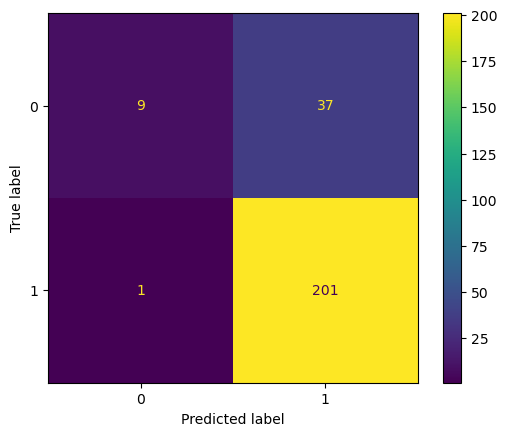

In [47]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()

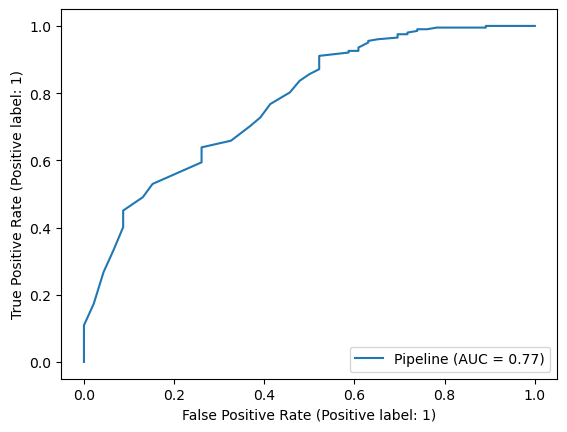

In [48]:
RocCurveDisplay.from_estimator( rfc_pipe, X_test, y_test )

# 2nd Model with Grid Search for Random Forest

In [53]:
params = {}
params['rfc__criterion'] = ['gini', 'entropy']
params['rfc__max_depth'] = [10, 20, None]
params['rfc__min_samples_leaf'] = [1,2,3]

gs_rfc = GridSearchCV(estimator= rfc_pipe,
                 param_grid=params,
                 scoring='recall_macro',
                 n_jobs = 2,
                 verbose= 3)

In [54]:
gs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_spars

GridSearchCV(estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    "she's",
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it',
                                                                    "it's",
                                                                    'its',
                                                                    'itself', ...],
                                                        tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x1635a3150>>)),
                                       ('smote',
                                        SMOTE(random_state=42,
                                              sampling_strategy=1)),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=2,
             param_grid={'rfc__criterion': ['gini', 'entropy'],
                         'rfc__max_depth': [10, 20, None],
                         'rfc__min_samples_leaf': [1, 2, 3]},
             scoring='recall_macro', verbose=3)

In [55]:
gs_rfc.best_params_

{'rfc__criterion': 'gini', 'rfc__max_depth': None, 'rfc__min_samples_leaf': 1}

In [56]:
rfc_best_pipe = ImPipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                    stop_words=stop_list)), # NLP preprocessing: tokenize, remove stopwords, punctunations, lowercase
                     ('smote', SMOTE(sampling_strategy = 1, random_state = 42)), # use SMOTE to get 1:1 ratio for both classes
                     ('rfc', RandomForestClassifier(criterion = 'gini',
                                                    max_depth = None,
                                                    min_samples_leaf = 1,
                                                    random_state = 42))]) # revised based on best_params

rfc_best_pipe.fit(X_train, y_train) 

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x1635a3150>>)),
                ('smote', SMOTE(random_state=42, sampling_strategy=1)),
                ('rfc', RandomForestClassifier(random_state=42))])

In [57]:
y_pred = rfc_best_pipe.predict(X_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.20      0.32        46
           1       0.84      1.00      0.91       202

    accuracy                           0.85       248
   macro avg       0.87      0.60      0.62       248
weighted avg       0.85      0.85      0.80       248



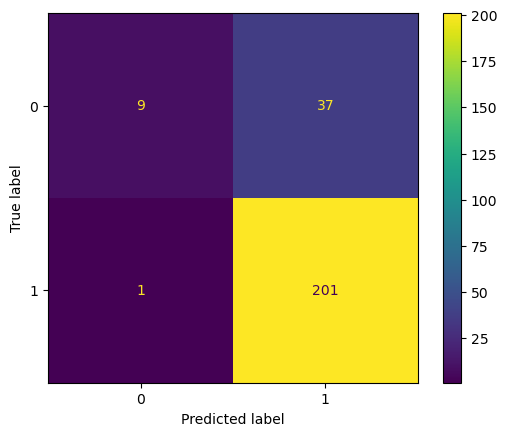

In [58]:
cm3 = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot()
plt.show()

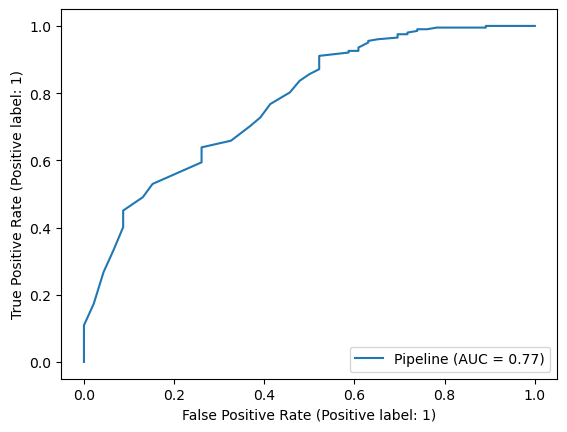

In [59]:
RocCurveDisplay.from_estimator( rfc_best_pipe, X_test, y_test )

# Logistic Regression Model

Pipeline

In [60]:
logreg_pipe = ImPipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                   stop_words=stop_list)), 
    ('smote', SMOTE(sampling_strategy = 1, random_state = 42)),
    ('lr', LogisticRegression(random_state=42))
])

logreg_pipe.fit(X_train, y_train)

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x1635a3150>>)),
                ('smote', SMOTE(random_state=42, sampling_strategy=1)),
                ('lr', LogisticRegression(random_state=42))])

In [61]:
y_pred = logreg_pipe.predict(X_test)

In [62]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.37      0.48        46
           1       0.87      0.96      0.91       202

    accuracy                           0.85       248
   macro avg       0.77      0.66      0.70       248
weighted avg       0.83      0.85      0.83       248



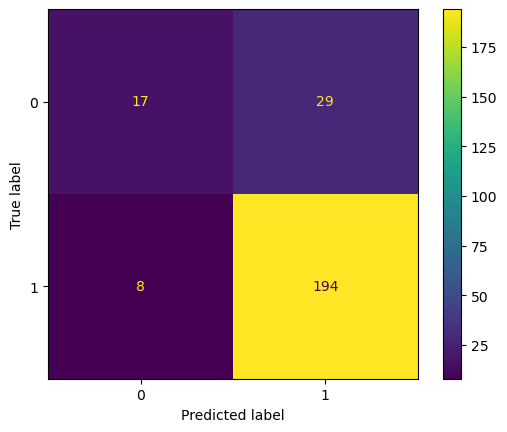

In [63]:
cm4 = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4)
disp.plot()
plt.show()

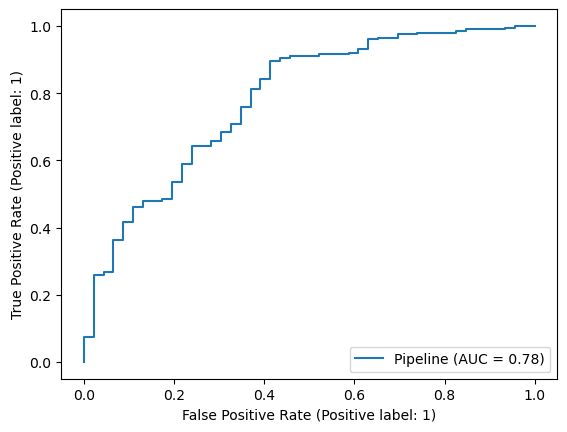

In [64]:
RocCurveDisplay.from_estimator(logreg_pipe , X_test, y_test )

# Gridsearch with logistic regression

In [65]:
params = {}
params['lr__class_weight'] = ['balanced']
params['lr__max_iter'] = [100, 200, 300, 500, 700,1000]
params['lr__C'] = [0.01, 0.1, 1]
params['lr__solver'] = ['liblinear', 'lbfgs', 'sag','saga', 'newton-cholesky']



gs_logreg = GridSearchCV(estimator=logreg_pipe, 
                              param_grid = params, 
                              scoring='accuracy')

In [66]:
gs_logreg.fit(X_train,  y_train)
gs_logreg.best_params_

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-pa

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-pa

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-pa

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-pa

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-pa

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-pa

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-pa

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-pa

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-pa

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-pa

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-pa

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-pa

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-pa

{'lr__C': 1,
 'lr__class_weight': 'balanced',
 'lr__max_iter': 100,
 'lr__solver': 'liblinear'}

In [67]:
logreg_best_pipe = ImPipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                   stop_words=stop_list)), 
    ('smote', SMOTE(sampling_strategy = 1, random_state = 42)),
    ('lr', LogisticRegression(random_state=42,
                             C = 1,
                             class_weight = 'balanced',
                             max_iter = 100,
                             solver = 'liblinear'))
])

logreg_best_pipe.fit(X_train, y_train)

/Users/mikhaelhammer-bleich/anaconda3/envs/new-learn2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x1635a3150>>)),
                ('smote', SMOTE(random_state=42, sampling_strategy=1)),
                ('lr',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=42, solver='liblinear'))])

In [68]:
y_pred = logreg_best_pipe.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.37      0.48        46
           1       0.87      0.96      0.91       202

    accuracy                           0.85       248
   macro avg       0.77      0.66      0.70       248
weighted avg       0.83      0.85      0.83       248



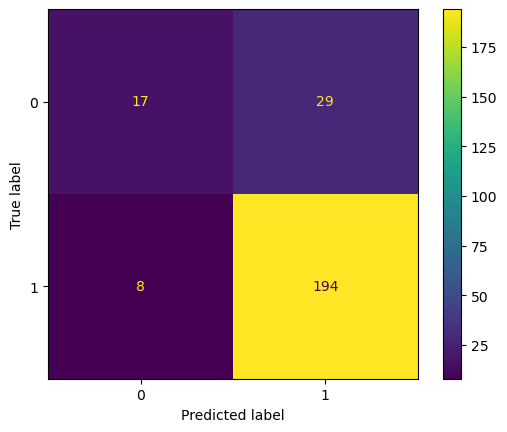

In [70]:
cm5 = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm5)
disp.plot()
plt.show()

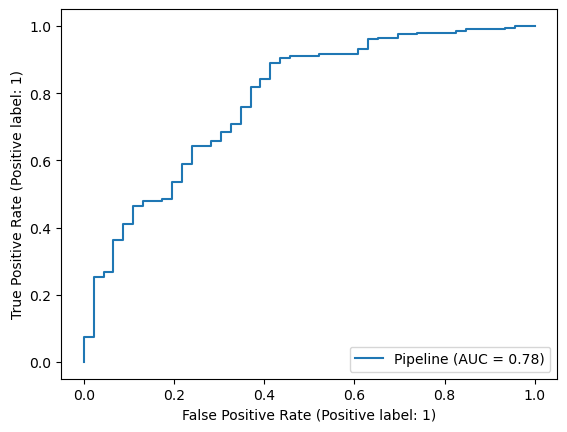

[CV 2/5] END rfc__criterion=gini, rfc__max_depth=10, rfc__min_samples_leaf=1, vectorizer__norm=l1;, score=0.496 total time=   0.2s
[CV 3/5] END rfc__criterion=gini, rfc__max_depth=10, rfc__min_samples_leaf=1, vectorizer__norm=l1;, score=0.500 total time=   0.1s
[CV 5/5] END rfc__criterion=gini, rfc__max_depth=10, rfc__min_samples_leaf=1, vectorizer__norm=l1;, score=0.524 total time=   0.1s
[CV 2/5] END rfc__criterion=gini, rfc__max_depth=10, rfc__min_samples_leaf=1, vectorizer__norm=l2;, score=0.571 total time=   0.1s
[CV 4/5] END rfc__criterion=gini, rfc__max_depth=10, rfc__min_samples_leaf=1, vectorizer__norm=l2;, score=0.524 total time=   0.1s
[CV 1/5] END rfc__criterion=gini, rfc__max_depth=10, rfc__min_samples_leaf=2, vectorizer__norm=l1;, score=0.500 total time=   0.1s
[CV 4/5] END rfc__criterion=gini, rfc__max_depth=10, rfc__min_samples_leaf=2, vectorizer__norm=l1;, score=0.520 total time=   0.1s
[CV 1/5] END rfc__criterion=gini, rfc__max_depth=10, rfc__min_samples_leaf=2, vecto

[CV 1/5] END rfc__criterion=gini, rfc__max_depth=10, rfc__min_samples_leaf=1, vectorizer__norm=l1;, score=0.500 total time=   0.2s
[CV 4/5] END rfc__criterion=gini, rfc__max_depth=10, rfc__min_samples_leaf=1, vectorizer__norm=l1;, score=0.544 total time=   0.1s
[CV 1/5] END rfc__criterion=gini, rfc__max_depth=10, rfc__min_samples_leaf=1, vectorizer__norm=l2;, score=0.564 total time=   0.1s
[CV 3/5] END rfc__criterion=gini, rfc__max_depth=10, rfc__min_samples_leaf=1, vectorizer__norm=l2;, score=0.560 total time=   0.1s
[CV 5/5] END rfc__criterion=gini, rfc__max_depth=10, rfc__min_samples_leaf=1, vectorizer__norm=l2;, score=0.595 total time=   0.1s
[CV 2/5] END rfc__criterion=gini, rfc__max_depth=10, rfc__min_samples_leaf=2, vectorizer__norm=l1;, score=0.496 total time=   0.1s
[CV 3/5] END rfc__criterion=gini, rfc__max_depth=10, rfc__min_samples_leaf=2, vectorizer__norm=l1;, score=0.496 total time=   0.1s
[CV 5/5] END rfc__criterion=gini, rfc__max_depth=10, rfc__min_samples_leaf=2, vecto

In [71]:
RocCurveDisplay.from_estimator(logreg_best_pipe , X_test, y_test )